### We want to explore the basic concept that a crypto currency's price should grow proportionally to the value being transacted on the network according to the Quantity Theory of Money. This generally holds true for BTC, with the exception of the speculative bubble in 2015 and 2017.


#### Summary:

* The Quantity Theory of Money relates the value of a currency to the real value of goods and services transacted using that currency.  
* If we assume a fixed velocity and average transaction size (in USD), then we can use the quantity theory of money to predict the value of Bitcoin quite accurately, except during the bubble of 2014.
* The price of Bitcoin started to excede the price predicted by the quantity theory of money at the begining of 2017, indicating that the price has been inflated by speculation since early 2017, and could return to a level predicted by transaction volume if the bubble bursts.

### Quantity theory of money states: 

$ MV = PQ $

### Where:
* M = Money supply (amount of money in circulation)
* V = Velosity (rate at which money moves through an economy)
* P = Price level (accounting for inflation) 
* T = Real value of transactions in the economy 

In traditional macro economics the [Quantity Theory of Money](https://en.wikipedia.org/wiki/Quantity_theory_of_money) is used to show the relationship between inflation (P) and printing money (M). [Velocity](https://fred.stlouisfed.org/series/M2V) (V) and GDP (T) are realtively constant, and cannot be changed by a government in the short term. So the equation shows that if you print money (increase M), inflation goes up (increase P). According to most economists, print some money is fine, [printing too much is bad](https://www.bloomberg.com/news/articles/2016-04-27/venezuela-faces-its-strangest-shortage-yet-as-inflation-explodes).

However, when applied to bitcoin, this equation has very different implications:
1. The money supply is relatively fixed (it appreciates slowly and cannot be manipulated by a central government). The supply of Bitcoin increases at a fixed, relatively slow rate, and lost Bitcoins are not replaced, so the theoretical amount in circulation is actually an overstatement.
2. The real value of transactions in the economy is able to change dramatically as people start to transact in the currency more (or less). In a macroeconomic sence Bitcion is a rapidly growing economy. Every time someone pays decides to pay for something in Bitcoin rather than in USD, this is the equivalent of them traveling to another country to transact (sort of). Obviously it can go down too if people switch to other currencies. 

Bitcoin has primarily experienced *Deflation* rather than *Inflation* like a normal currency does. This follows from the previous two statements. Normal currencies typically experience *mild inflation* because the central governemnt prints moeny slightly faster than GDP growth. A dollar will buy you less next year than it did this year. Arguably this has some good effects, but libertarians will tell you otherwise. 

So far, Bitcoin on the other hand, has experienced *deflation* meaning a bitcoin will generally buy you more next year than it will this year (excluding the speculative bubble in 2014 and 2017?). This is not because Bitcoin is a Panzi scheme, but because the number of people using it for real things (buying pizza, hiding money from the Chinese government, buing drugs, gambling, etc.) has increased far faster than the supply of Bitcoin. 

In the equation this happens because M and V are both *relatively* fixed, so as the value of the economy transacted in BTC (T) increases, the Price Level (P) must decrease to balance the equation. A decrease in the price level corresponds to an increase in the value of an individual Bitcoin (deflation).





### We will start by pulling in a history of bitcoin's transactions, price, and supply.

In [1]:
% pylab inline
import pandas as pd
import scipy.signal as sps
from datetime import datetime
import seaborn

Populating the interactive namespace from numpy and matplotlib


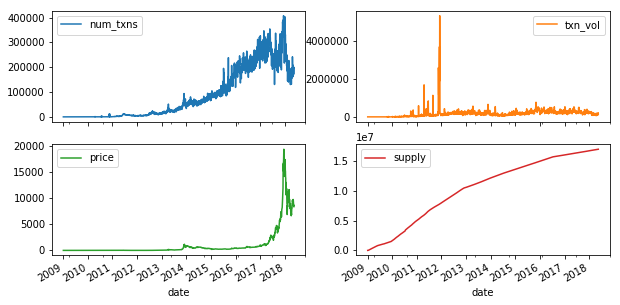

In [2]:
n_url = 'https://api.blockchain.info/charts/n-transactions-excluding-popular?timespan=all&format=csv'
a_url = 'https://api.blockchain.info/charts/estimated-transaction-volume?timespan=all&format=csv'
p_url = 'https://api.blockchain.info/charts/market-price?timespan=all&format=csv'
m_url = 'https://api.blockchain.info/charts/total-bitcoins?timespan=all&format=csv'


# number of transactions excluding 100 most popular addresses
d = pd.read_csv(n_url, names=['date', 'num_txns'], parse_dates = ['date'], index_col=0) 


# total BTC transaction volume per day
d['txn_vol'] = pd.read_csv(a_url, names=['date', 'txn_vol'], parse_dates = ['date'], index_col=0) 
# price in USD
d['price'] = pd.read_csv(p_url,names=['date', 'price'], parse_dates = ['date'], index_col=0)
# supply of Bitcoin in circulation
d['supply'] = pd.read_csv(m_url,names=['date', 'supply'], parse_dates = ['date'], index_col=0)


figsize(10,5)
fig = plt.figure()
# rotate and align the tick labels so they look better
fig.autofmt_xdate()

with pd.plotting.plot_params.use('x_compat', True):
    d.plot(subplots=True, layout=(2,2));

### These are pretty noisy, so we smooth things out a bit

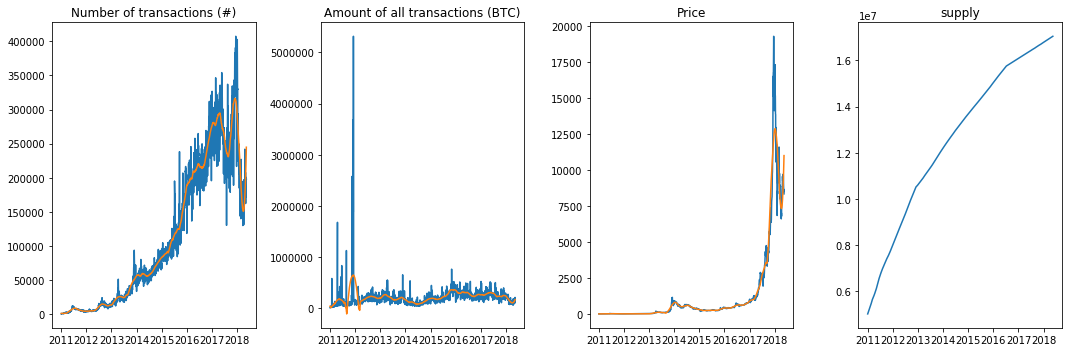

In [3]:
#we will take 100 day moving averages of these quantities to smooth out local noise
d['num_txns_avg'] = sps.savgol_filter(d['num_txns'], 99, 3)
d['txn_vol_avg'] = sps.savgol_filter(d['txn_vol'], 99, 3)
d['price_avg'] = sps.savgol_filter(d['price'], 99, 3)

d_s = d.loc['2011-01-01':]

figsize(15,5)
fig = plt.figure()
fig.autofmt_xdate() # rotate and align the tick labels so they look better

with pd.plotting.plot_params.use('x_compat', True):
    
    subplot(1,4,1)
    plot(d_s['num_txns'])
    plot(d_s['num_txns_avg'])
    title('Number of transactions (#)')

    subplot(1,4,2)
    plot(d_s['txn_vol'])
    plot(d_s['txn_vol_avg'])
    title('Amount of all transactions (BTC)')
    
    subplot(1,4,3)
    plot(d_s['price'])
    plot(d_s['price_avg'])
    title('Price')

    subplot(1,4,4)
    plot(d_s['supply'])
    title('supply')
    
plt.tight_layout()

 We know the number of transactions per day excluding popular addresses, but we need the value of those transactions in order to calculate the non-speculative value being transacted on the network in a given day.

We calculate average transaciton size by divding daily total transaction amount (in USD) by the transaction volume excluding 100 most popular addresses.

Looking at this, we clearly see a skew during the 2014 and 2017 bubbles. 

In the 2.5 years from mid 2014 to the end of 2016 average transaction size stayed between \$500 and \$1000 the entire time with a mean of \$671. 

It stands to reason that the average transaction size in USD of non-speculative transactions should not change dramatically during a bubble. The *real* price of pizza, video games, and drugs does not change because people are speculating on bitcoin.

#### We will use this average transaction size of \$671 as the average size for non-speculative transactions.



Avg txn size (USD) 2015-2017:  671.6317717


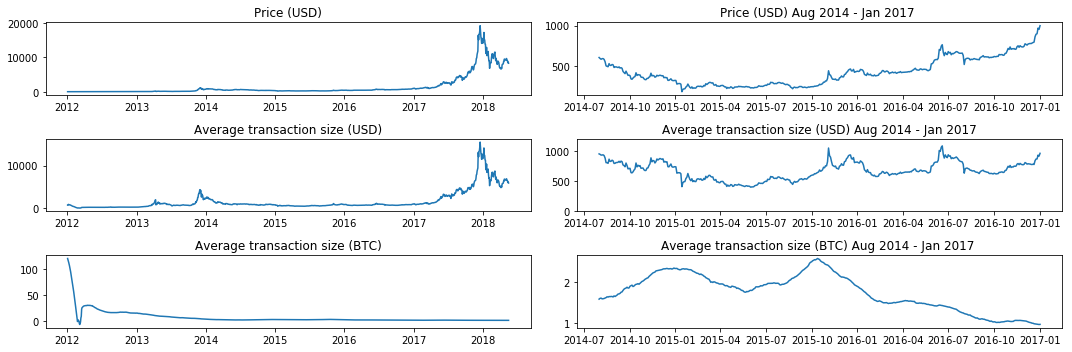

In [4]:
d['txn_size_BTC'] = d.txn_vol_avg / d.num_txns_avg
d['txn_size_USD'] = d.txn_vol_avg * d.price / d.num_txns_avg

subplot(3,2,1)
plot(d.price.loc['2012-01-01':])
title('Price (USD)')

subplot(3,2,2)
plot(d.price.loc['2014-08-01':'2017-01-01'])
title('Price (USD) Aug 2014 - Jan 2017 ')

subplot(3,2,3)
plot(d.txn_size_USD.loc['2012-01-01':])
title('Average transaction size (USD)')

subplot(3,2,4)
plot(d.txn_size_USD.loc['2014-08-01':'2017-01-01'])
ylim(0,1200)
title('Average transaction size (USD) Aug 2014 - Jan 2017')

subplot(3,2,5)
plot(d.txn_size_BTC.loc['2012-01-01':])
title('Average transaction size (BTC)')

subplot(3,2,6)
plot(d.txn_size_BTC.loc['2014-08-01':'2017-01-01'])
title('Average transaction size (BTC) Aug 2014 - Jan 2017 ')

txn_size_USD_avg = mean(d.txn_size_USD.loc['2014-08-01':'2017-01-01'])

print 'Avg txn size (USD) 2015-2017: ', txn_size_USD_avg
plt.tight_layout()

### Now we get to the basic investment thesis that the value of Bitcoin should appreciate proportionally to the real value being transacted on the network.

We calculate the daily transaction volume in USD based on the Number of daily transactions excluding top 100 addresses and our average USD transaction size. 

When we plot it against the price, we see the two values trend very close together, excluding the bubble in 2014 and 2017.

When we look at the 2014 bubble, we see that non-speculative transactions more than doubled from 2013 to 2015, which very accurately predicts the price where BTC fell back to post-crach. 

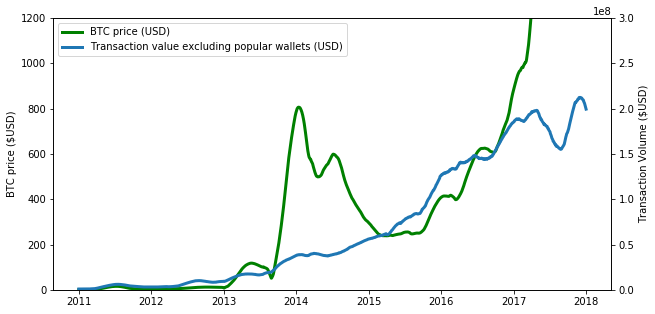

In [5]:
d['txn_vol_USD'] = d.num_txns_avg * txn_size_USD_avg

d_s = d.loc['2011-01-01':'2018-01-01']

P_lim = 1200
T_lim = 300000000

figsize(10,5)
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ln1 = ax1.plot(d_s['price_avg'], color='g', label='BTC price (USD)', linewidth=3)
ln2 = ax2.plot(d_s['txn_vol_USD'], label='Transaction value excluding popular wallets (USD)', linewidth=3)

ax1.set_ylim((0,P_lim))
ax1.set_ylabel(r"BTC price ($USD)")
ax2.set_ylim((0,T_lim))
ax2.set_ylabel(r"Transaction Volume ($USD)")


lns = ln1+ln2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=0)

### Next we will calculate the daily Velocity of bitcoin. 

[Velocity is defined](https://en.wikipedia.org/wiki/Velocity_of_money) as the amount of money that changes hands in a given time period divided by the total money supply.\*

Calculating this we see the daily velocity of bitcoin stays remarkably constant right around 0.016 (excluding noise before 2012).\*\* 

#### We will take 0.016 as a constant daily velocity for bitcoin.

\* * Technically transactions that are not counted in GDP should not be included in Velocity, but this is largely imposed to keep this equation internally consistent with the definition of GDP. We can ignore that because we primarily care about the value of goods and services being transacted across the network.*

\*\* *We don't need a super precise number here since this is a somewhat abstract concept, and economists disagree on the velocity of other currencies anyways*


Average velocity:  0.016


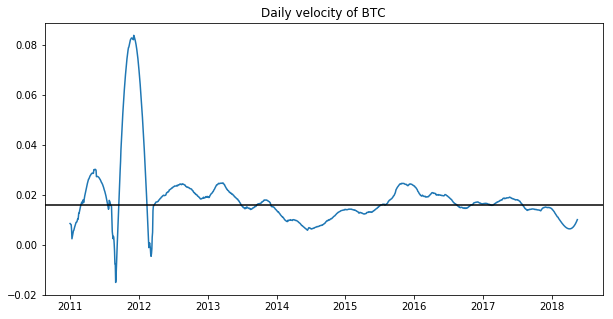

In [6]:
d['velocity'] = d.txn_vol_avg/d.supply

velocity_avg = mean(d.velocity.loc['2012-06-01':])

plot(d.velocity.loc['2011-01-01':])
axhline(velocity_avg, color='k')
title('Daily velocity of BTC')

print "Average velocity: ", round(velocity_avg, 3)

### Putting all of this together we can use average velocity, average transaction size, transaction volume, and money supply to calculate a predicted price of Bitcoin based on the transaction volume on the network.

$MV = PT$

In this form of the equation P is *Price level* which is inversely proportional to price: $P_{BTC} =  \frac{1}{price}$

$MV = \frac{T_{USD}}{P_{BTC}}$

$P_{BTC} = \frac{T_{USD}}{MV}$

#### Our predicted price comes out remarkably close to the actual price of bitcoin in non-bubble periods.


Text(0.5,1,u'Actual price & predicted price from transaction volume')

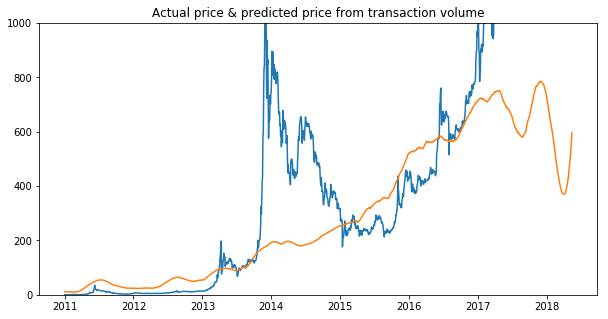

In [7]:
d['price_predicted'] = d['txn_vol_USD'] / (d.supply * velocity_avg)

start_date = '2011-01-01'

plot(d.price.loc[start_date:])
plot(d.price_predicted.loc[start_date:])
#plt.yscale('log')
ylim(0,1000)
title("Actual price & predicted price from transaction volume")

#### Looking at transaction volumes, we see that transaction volumes actually fell below 2016 levels at the end of 2018. This coincides with the network capacity issues Bitcoin faced in the second half of 2017 and begining of 2018. 

Transaction fees increased dramatically as network capacity was reached due to people bidding higher transaction fees to have their transactions included in fixed block sizes.

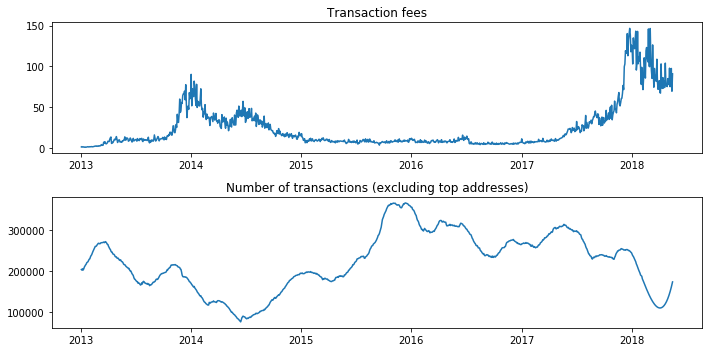

In [11]:
txn_fee_url = 'https://api.blockchain.info/charts/cost-per-transaction?timespan=all&format=csv'
    
    # number of transactions excluding 100 most popular addresses
txn_fees = pd.read_csv(txn_fee_url, names=['date', 'txn_cost'], parse_dates = ['date'], index_col=0) 

start_date = '2013-01-01'

subplot(2,1,1)
plot(txn_fees.loc[start_date:])
title('Transaction fees')
subplot(2,1,2)
plot(d.txn_vol_avg.loc[start_date:])
title('Number of transactions (excluding top addresses)')

plt.tight_layout()

The increase in transaction fees and corresponding decrease in transaction volume represents a real threat to Bitcoin. A variety of online outlets [stopped accepting bitcoin due to the high fees](https://arstechnica.com/tech-policy/2018/02/bitcoins-transaction-fee-crisis-is-over-for-now/). Darkweb markets have [also increasingly switched](https://www.theatlantic.com/business/archive/2018/03/bitcoin-crash-dark-web/553190/) from Bitcoin to privacy coins like Monero, removing another source of non-speculative transactions using Bitcion. 

#### This represents a serious threat to the health of Bitcoin, since long-term value appreciation is predicated on more people using Bitcion for non-speculative economic activity.

If the bubble bursts in a similar manner to the 2014 bubble, we would expect the price to fall back to a level predicted by the number of non-speculative transaction volume on the network. If non-speculative transaction volumes have actually fallen during the bubble, it is possible the value of Bitcoin could fall back to below pre-bubble levels.

#### One could argue that we are not in a bubble because Bitcoin is now primarily being used as a store of value rather than a payment medium. This would mean Bitcoin's value should no longer be determined by the quantity theory of money. 

It is plausible that Bitcoin is making a similar transition as gold from a medium of exchange to a pure store of value. Historically gold was used as currency, and had vaule because people were frequently handing eachother pieces of gold in exchange for goods and services. Today gold is generally not used as a currency (except by libertarians) but retains value because most people in the world agree that it is a stable way to store money. If Bitcoin is successfully replaced by other currencies or payment layers like Lightning Network, it is possible that it would maintain its status as an agreed upon store of value, but not directly be used for economic activity. In the currency analogy, Lightning would be akin to a currency on the gold standard, and other currencies that were better for transacting would have a similar relationship to Bitcoin as the US dollar has to gold.